In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

#pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
print('max_rows:' , pd.options.display.max_rows)
print('max_columns:' , pd.options.display.max_columns)
%matplotlib inline 

max_rows: 60
max_columns: 999


In [2]:
movies = pd.read_csv('data/link.csv') 
movies.head()

movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

In [3]:
imdbId_list = movies['imdbId'].tolist()
imdbId_list[:5]

[114709, 113497, 113228, 114885, 113041]

In [4]:
def construct_url(imdbId):
    url = ''
    num_of_zeros = 7 - len(str(imdbId))
    url = 'http://www.imdb.com/title/tt' + '0'*num_of_zeros + str(imdbId)
    return url
        

In [5]:
movies['imdb_url'] = movies['imdbId']
movies['imdb_url'] = movies['imdb_url'].apply(construct_url)
movies.head()

movieId  imdbId   tmdbId                             imdb_url
0        1  114709    862.0  http://www.imdb.com/title/tt0114709
1        2  113497   8844.0  http://www.imdb.com/title/tt0113497
2        3  113228  15602.0  http://www.imdb.com/title/tt0113228
3        4  114885  31357.0  http://www.imdb.com/title/tt0114885
4        5  113041  11862.0  http://www.imdb.com/title/tt0113041

In [6]:
import json

with open('poster_urls.json') as json_data:
    data = json.load(json_data)

In [7]:
poster_urls = pd.DataFrame.from_dict(data, orient='index').reset_index()

In [8]:
poster_urls.rename(columns={'index':'imdb_url', 0:'poster_url'}, inplace=True)

In [9]:
movies = movies.merge(poster_urls, on='imdb_url')

In [10]:
movies

movieId  imdbId    tmdbId                             imdb_url  \
0          1  114709     862.0  http://www.imdb.com/title/tt0114709   
1          2  113497    8844.0  http://www.imdb.com/title/tt0113497   
2          3  113228   15602.0  http://www.imdb.com/title/tt0113228   
3          4  114885   31357.0  http://www.imdb.com/title/tt0114885   
4          5  113041   11862.0  http://www.imdb.com/title/tt0113041   
5          6  113277     949.0  http://www.imdb.com/title/tt0113277   
6          7  114319   11860.0  http://www.imdb.com/title/tt0114319   
7          8  112302   45325.0  http://www.imdb.com/title/tt0112302   
8          9  114576    9091.0  http://www.imdb.com/title/tt0114576   
9         10  113189     710.0  http://www.imdb.com/title/tt0113189   
10        11  112346    9087.0  http://www.imdb.com/title/tt0112346   
11        12  112896   12110.0  http://www.imdb.com/title/tt0112896   
12        13  112453   21032.0  http://www.imdb.com/title/tt0112453   
13        14  113987   10858.0  http://www.imdb.com/title/tt0113987   
14        15  112760    1408.0  http://www.imdb.com/title/tt0112760   
15        16  112641     524.0  http://www.imdb.com/title/tt0112641   
16        17  114388    4584.0  http://www.imdb.com/title/tt0114388   
17        18  113101       5.0  http://www.imdb.com/title/tt0113101   
18        19  112281    9273.0  http://www.imdb.com/title/tt0112281   
19        20  113845   11517.0  http://www.imdb.com/title/tt0113845   
20        21  113161    8012.0  http://www.imdb.com/title/tt0113161   
21        22  112722    1710.0  http://www.imdb.com/title/tt0112722   
22        23  112401    9691.0  http://www.imdb.com/title/tt0112401   
23        24  114168   12665.0  http://www.imdb.com/title/tt0114168   
24        25  113627     451.0  http://www.imdb.com/title/tt0113627   
25        26  114057   16420.0  http://www.imdb.com/title/tt0114057   
26        27  114011    9263.0  http://www.imdb.com/title/tt0114011   
27        28  114117   17015.0  http://www.imdb.com/title/tt0114117   
28        29  112682     902.0  http://www.imdb.com/title/tt0112682   
29        30  115012   37557.0  http://www.imdb.com/title/tt0115012   
..       ...     ...       ...                                  ...   
961      988  116442   58985.0  http://www.imdb.com/title/tt0116442   
962      989  114354     890.0  http://www.imdb.com/title/tt0114354   
963      990  117011   10861.0  http://www.imdb.com/title/tt0117011   
964      991  117039    1770.0  http://www.imdb.com/title/tt0117039   
965      992  117473   44465.0  http://www.imdb.com/title/tt0117473   
966      993  116635    2033.0  http://www.imdb.com/title/tt0116635   
967      994  115678   18203.0  http://www.imdb.com/title/tt0115678   
968      996  116830    9333.0  http://www.imdb.com/title/tt0116830   
969      997  115847   47260.0  http://www.imdb.com/title/tt0115847   
970      998  117603    9400.0  http://www.imdb.com/title/tt0117603   
971      999  115438    9401.0  http://www.imdb.com/title/tt0115438   
972     1000  115994   12241.0  http://www.imdb.com/title/tt0115994   
973     1001   83587   25739.0  http://www.imdb.com/title/tt0083587   
974     1002  116167  161806.0  http://www.imdb.com/title/tt0116167   
975     1003  116259   11306.0  http://www.imdb.com/title/tt0116259   
976     1004  116421    9625.0  http://www.imdb.com/title/tt0116421   
977     1005  116000   10680.0  http://www.imdb.com/title/tt0116000   
978     1006  115862    6346.0  http://www.imdb.com/title/tt0115862   
979     1007   72653   18660.0  http://www.imdb.com/title/tt0072653   
980     1008   47977   35115.0  http://www.imdb.com/title/tt0047977   
981     1009   72951   14821.0  http://www.imdb.com/title/tt0072951   
982     1010   64603   14136.0  http://www.imdb.com/title/tt0064603   
983     1011   71607   10869.0  http://www.imdb.com/title/tt0071607   
984     1012   50798   22660.0  http://www.imdb.com/title/tt0050798   
985     1013   55277   19186.

In [11]:
dfpadas = movies[['imdbId','poster_url']]

In [12]:
from tqdm import tqdm 

savelocation = 'img/'

import urllib

for index, row in tqdm(dfpadas.iterrows()):
    url = row['poster_url']
    id = str(row['imdbId'])
    jpgname = savelocation+id+'.jpg'
    urllib.request.urlretrieve(url, jpgname)

991it [01:24, 11.77it/s]


In [1]:
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model

Using TensorFlow backend.


In [2]:
base_modelv3 = InceptionV3(weights='imagenet', include_top=False)
model= Model(inputs=base_modelv3.input,  outputs=base_modelv3.get_layer(index=-1).output)

In [3]:
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [4]:
def preprocess_input(x):
    x /= 255.
    x -= 0.5
    x *= 2.
    return x

def load_photos_predict(directory):
    images = []
    for name in listdir(directory):
        filename = directory + '/' + name
        image = load_img(filename, target_size=(299, 299))
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)
        image = preprocess_input(image)
        image_id = name.split('.')[0]
        feature = model.predict(image).ravel()
        images.append((image_id, image, feature))
    return images

In [7]:
images = load_photos_predict('img')

In [8]:
images_df = pd.DataFrame(images)
images_df.head()

0                                                  1  \
0  113674  [[[[0.9372549  0.9529412  0.92941177], [0.9372...   
1  106537  [[[[0.5294118  0.92156863 0.827451  ], [0.5294...   
2  112556  [[[[-0.6627451  -0.42745095  0.27843142], [-0....   
3   29588  [[[[1.        0.9137255 1.       ], [1.       ...   
4   32143  [[[[0.90588236 0.8509804  0.6313726 ], [0.9058...   

                                                   2  
0  [-0.0, -0.0, 1.0867126, -0.0, 0.10326447, -0.0...  
1  [-0.0, -0.0, -0.0, 0.16188309, -0.0, -0.0, -0....  
2  [-0.0, -0.0, 0.6870034, -0.0, -0.0, -0.0, -0.0...  
3  [0.4066343, 0.19083792, -0.0, -0.0, 1.0475547,...  
4  [-0.0, 0.22627941, -0.0, 0.27589214, -0.0, -0....

In [9]:
images_df.rename(columns={0:'image_id', 1:'image_array', 2:'feature_array'}, inplace=True)
images_df['feature_array'][0]

array([-0.        , -0.        ,  1.0867126 , ...,  1.5005039 ,
       -0.        ,  0.35737127], dtype=float32)

In [10]:
type(images_df['image_id'][0])

str

In [11]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import numpy
nn_num = 6
X = list(images_df['feature_array'])
knn = NearestNeighbors(n_neighbors=nn_num, algorithm='ball_tree', metric='euclidean', n_jobs = -1).fit(X)

In [12]:
knn.kneighbors(images_df['feature_array'][0].reshape(1,-1), return_distance=False)

array([[  0, 238, 855,  61, 959, 553]])

In [13]:
images_df['feature_array'][0]

array([-0.        , -0.        ,  1.0867126 , ...,  1.5005039 ,
       -0.        ,  0.35737127], dtype=float32)

In [14]:
images_df['feature_array'][0].reshape(1,-1)

array([[-0.        , -0.        ,  1.0867126 , ...,  1.5005039 ,
        -0.        ,  0.35737127]], dtype=float32)

In [15]:
indices = knn.kneighbors(images_df['feature_array'][0].reshape(1,-1), return_distance=False)
indices

array([[  0, 238, 855,  61, 959, 553]])

In [16]:
indices.tolist()[0]

[0, 238, 855, 61, 959, 553]

In [17]:
images_df[(images_df.index == 238)].iloc[0]['image_id']

'115639'

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def find_nbrs(indices, images_df):
    nbrs = []
    for i in range(len(indices)): 
        nbr_index = indices[i]
        image_id = images_df[(images_df.index == nbr_index)].iloc[0]['image_id']
        nbrs.append(image_id)
    # this returns a list of image ids
    return nbrs

def find_nbr_file_paths(nbrs, directory):
    paths = []
    for i in range(len(nbrs)): 
        image_id = nbrs[i]
        file_path = directory + image_id + '.jpg'
        paths.append(file_path)
    return paths

def show_recommendations(image_id, name='CNN', image_df=images_df, knn=knn, directory='img/', feature_column_name='feature_array'):
    feature_array = image_df[(image_df['image_id'] == image_id)].iloc[0][feature_column_name].reshape(1,-1)
    indices = knn.kneighbors(feature_array, return_distance=False)
    indices = indices.tolist()[0]
    nbrs = find_nbrs(indices, image_df)
    paths = find_nbr_file_paths(nbrs, directory)
    fig, ((ax1, ax2, ax3, ax4, ax5, ax6)) = plt.subplots(nrows=1, ncols=6, sharex=True, sharey=True, figsize=(28,6))
    ax1.imshow(mpimg.imread(paths[0]))
    ax1.set_title(r"$\bf{" + str(name) + "}$"+"\n Targer:\n"+ nbrs[0])
    ax1.set_yticklabels([])
    ax2.imshow(mpimg.imread(paths[1]))
    ax2.set_title("Rec 1:\n"+ nbrs[1])
    ax3.imshow(mpimg.imread(paths[2]))
    ax3.set_title("Rec 2:\n"+ nbrs[2])
    ax4.imshow(mpimg.imread(paths[3]))
    ax4.set_title("Rec 3:\n"+ nbrs[3])
    ax5.imshow(mpimg.imread(paths[4]))
    ax5.set_title("Rec 4:\n"+ nbrs[4])
    ax6.imshow(mpimg.imread(paths[5]))
    ax6.set_title("Rec 5:\n"+ nbrs[5])

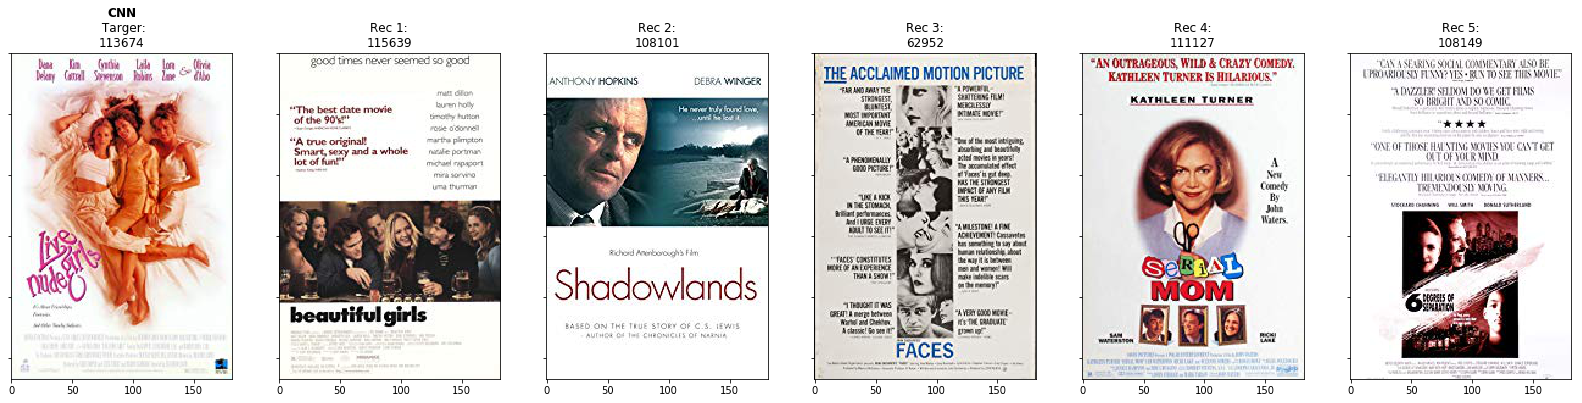

In [19]:
show_recommendations('113674')